In [12]:
!git clone --depth 1 --branch main --single-branch https://github.com/CaiqueBorges/Projeto_cats-dogs.git images_cats-dogs

Cloning into 'images_cats-dogs'...
remote: Enumerating objects: 850, done.
remote: Counting objects: 100% (850/850), done.
remote: Compressing objects: 100% (817/817), done.
remote: Total 850 (delta 33), reused 847 (delta 33), pack-reused 0
Receiving objects: 100% (850/850), 90.57 MiB | 30.86 MiB/s, done.
Resolving deltas: 100% (33/33), done.


In [1]:
## Importando as libs necessárias
from google.colab import files
import os, io, time

# Criando o diretório inicial: /content/
os.chdir('/content/')
try:
  os.mkdir('Imagens', )
except:
  print('A pasta já existe.')
os.chdir('./Imagens')
os.listdir()
uploaded_images = files.upload()

Saving Abyssinian_1.jpg to Abyssinian_1.jpg
Saving Abyssinian_2.jpg to Abyssinian_2.jpg
Saving Abyssinian_3.jpg to Abyssinian_3.jpg
Saving Abyssinian_4.jpg to Abyssinian_4.jpg
Saving Abyssinian_5.jpg to Abyssinian_5.jpg
Saving Abyssinian_6.jpg to Abyssinian_6.jpg
Saving Abyssinian_7.jpg to Abyssinian_7.jpg
Saving Abyssinian_8.jpg to Abyssinian_8.jpg
Saving Abyssinian_9.jpg to Abyssinian_9.jpg
Saving Abyssinian_10.jpg to Abyssinian_10.jpg
Saving Abyssinian_11.jpg to Abyssinian_11.jpg
Saving Abyssinian_12.jpg to Abyssinian_12.jpg
Saving Abyssinian_13.jpg to Abyssinian_13.jpg
Saving Abyssinian_14.jpg to Abyssinian_14.jpg
Saving Abyssinian_15.jpg to Abyssinian_15.jpg
Saving Abyssinian_16.jpg to Abyssinian_16.jpg
Saving Abyssinian_17.jpg to Abyssinian_17.jpg
Saving Abyssinian_18.jpg to Abyssinian_18.jpg
Saving Abyssinian_19.jpg to Abyssinian_19.jpg
Saving Abyssinian_20.jpg to Abyssinian_20.jpg
Saving Abyssinian_21.jpg to Abyssinian_21.jpg
Saving Abyssinian_22.jpg to Abyssinian_22.jpg
Saving

# HOG COM PCA

## Aplicando HOG e PCA

In [2]:
## Reduzir as imagens
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
## pandas
import pandas as pd
## Importando PCA do SkLearn
from sklearn.decomposition import PCA

hogs = [16,20,24,28,32,40]
pcas = [.10,.15,.20,.25,.30,.35,.40,.45,.50,.55,.60,.65,.70,.75,.80,.85,.90,.95]


hogs_pcas = []

for hog_size in hogs:
  hog_features = []
  for filename in uploaded_images.keys():
    image = imread(filename)
    image_resized = resize(image, (128,128))
    fd, hog_image = hog(image_resized, orientations=9, pixels_per_cell=(hog_size, hog_size),
                      cells_per_block=(2, 2), visualize=True, channel_axis=-1)
    hog_features.append(fd)

  ## Adicionar as colunas com os valores do hog para cada um
  data = {"pathfile": uploaded_images.keys(), "hog_features": hog_features}
  df = pd.DataFrame(data)
  df['classe'] = df['pathfile'].str.split('_').str[0]
  df = df.drop('pathfile', axis=1)

  # transformando cada valor do hog_feature em um atributo (coluna)
  df2 = pd.DataFrame(df['hog_features'].tolist())
  df2.columns = df2.columns.map(lambda x: f'hog_feature_{x+1}')
  df = pd.concat([df.drop('hog_features', axis=1), df2], axis=1)

  # ----- COMEÇANDO PCA ------
  for porcent in pcas:
    y = df.classe # Target variable (classe)
    X = df.copy().drop('classe', axis=1) # Features

    ##pca_obj = PCA(n_components=4) #para dizer quantos componentes quero ter
    pca_obj = PCA(n_components=porcent, whiten=True) #qual porcentagem de informação eu quero
    pca_result = pca_obj.fit_transform(X)

    print(f'hog de {hog_size}x{hog_size} e pca de {porcent}')
    print(f'shape: {pca_result.shape}')
    print()

    colunas = []
    for i in range(pca_result.shape[1]):
      colunas.append('pca_'+str(i))

    pca_dataset = pd.DataFrame(data = pca_result, columns = colunas) # Atual

    ## Juntando o atributo classe
    final_data = pca_dataset.join(y)

    # Salvando Pessoa.csv transformado
    df_hog_pca = pd.DataFrame(final_data)
    df_hog_pca.to_csv(f'{hog_size}x{hog_size}_pca-{porcent}.csv', index=False)

    # Importando arquivo transformado
    from google.colab import files
    files.download(f'{hog_size}x{hog_size}_pca-{porcent}.csv')
    hogs_pcas.append([hog_size, porcent, df_hog_pca])



hog de 16x16 e pca de 0.1
shape: (800, 2)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.15
shape: (800, 4)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.2
shape: (800, 7)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.25
shape: (800, 10)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.3
shape: (800, 14)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.35
shape: (800, 19)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.4
shape: (800, 24)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.45
shape: (800, 31)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.5
shape: (800, 39)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.55
shape: (800, 49)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.6
shape: (800, 60)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.65
shape: (800, 74)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.7
shape: (800, 90)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.75
shape: (800, 111)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.8
shape: (800, 138)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.85
shape: (800, 173)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.9
shape: (800, 225)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 16x16 e pca de 0.95
shape: (800, 313)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.1
shape: (800, 2)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.15
shape: (800, 3)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.2
shape: (800, 5)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.25
shape: (800, 7)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.3
shape: (800, 10)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.35
shape: (800, 13)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.4
shape: (800, 16)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.45
shape: (800, 21)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.5
shape: (800, 25)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.55
shape: (800, 31)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.6
shape: (800, 38)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.65
shape: (800, 46)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.7
shape: (800, 56)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.75
shape: (800, 69)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.8
shape: (800, 85)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.85
shape: (800, 107)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.9
shape: (800, 141)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 20x20 e pca de 0.95
shape: (800, 200)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.1
shape: (800, 1)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.15
shape: (800, 3)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.2
shape: (800, 4)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.25
shape: (800, 6)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.3
shape: (800, 7)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.35
shape: (800, 10)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.4
shape: (800, 12)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.45
shape: (800, 15)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.5
shape: (800, 19)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.55
shape: (800, 23)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.6
shape: (800, 28)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.65
shape: (800, 33)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.7
shape: (800, 40)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.75
shape: (800, 49)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.8
shape: (800, 60)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.85
shape: (800, 76)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.9
shape: (800, 100)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 24x24 e pca de 0.95
shape: (800, 143)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.1
shape: (800, 1)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.15
shape: (800, 2)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.2
shape: (800, 3)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.25
shape: (800, 4)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.3
shape: (800, 5)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.35
shape: (800, 7)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.4
shape: (800, 8)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.45
shape: (800, 10)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.5
shape: (800, 13)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.55
shape: (800, 15)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.6
shape: (800, 18)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.65
shape: (800, 22)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.7
shape: (800, 27)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.75
shape: (800, 32)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.8
shape: (800, 39)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.85
shape: (800, 50)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.9
shape: (800, 65)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 28x28 e pca de 0.95
shape: (800, 93)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.1
shape: (800, 1)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.15
shape: (800, 2)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.2
shape: (800, 3)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.25
shape: (800, 4)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.3
shape: (800, 5)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.35
shape: (800, 7)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.4
shape: (800, 8)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.45
shape: (800, 10)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.5
shape: (800, 12)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.55
shape: (800, 15)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.6
shape: (800, 18)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.65
shape: (800, 22)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.7
shape: (800, 26)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.75
shape: (800, 32)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.8
shape: (800, 39)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.85
shape: (800, 49)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.9
shape: (800, 64)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 32x32 e pca de 0.95
shape: (800, 92)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.1
shape: (800, 1)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.15
shape: (800, 1)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.2
shape: (800, 2)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.25
shape: (800, 2)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.3
shape: (800, 3)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.35
shape: (800, 4)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.4
shape: (800, 5)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.45
shape: (800, 6)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.5
shape: (800, 7)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.55
shape: (800, 9)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.6
shape: (800, 11)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.65
shape: (800, 13)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.7
shape: (800, 15)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.75
shape: (800, 18)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.8
shape: (800, 22)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.85
shape: (800, 27)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.9
shape: (800, 35)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

hog de 40x40 e pca de 0.95
shape: (800, 51)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Treinamento

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Dicionário para armazenar as acurácias por tamanho de HOG
hog_accuracies = {}
# Lista para armazenar todas as acurácias
all_accuracies = [['n_neighbors', 'hog_size', 'pca_porcent', 'accuracy']]
max_accuracy = [0,0,0,0,'','']

for n_neighbors in range(1,11):
  for hogs_vetor in hogs_pcas:
    hog_size = hogs_vetor[0]
    porcent = hogs_vetor[1]
    data = hogs_vetor[2]

    y = data.classe  # Target variable
    X = data.copy().drop('classe', axis=1)  # Features

    # Split dataset into training set and test set
    X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=73)  # 70% training and 30% test

    # Create KNeighborsClassifier object
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean')
    knn.fit(X_train_70, y_train_70)

    # Predict the response for the test dataset
    y_pred = knn.predict(X_test_30)

    # Model Accuracy
    acuracia = metrics.accuracy_score(y_test_30, y_pred)

    if acuracia > max_accuracy[3]:
      max_accuracy = [n_neighbors, hog_size, porcent, round(acuracia,3), y_test_30, y_pred]

    all_accuracies.append([n_neighbors,hog_size, porcent, round(acuracia,3)])

data_accuracies = pd.DataFrame(all_accuracies[1:], columns=all_accuracies[0])
matrix = data_accuracies.pivot(index=['hog_size', 'pca_porcent'], columns='n_neighbors', values='accuracy')

# Exibir a matriz
print(matrix.to_string(index=True, header=True))
print(f'Melhor resultado: n_neighbors {max_accuracy[0]}, hog de {max_accuracy[1]}x{max_accuracy[1]} e pca de {max_accuracy[2]}')
print(f'accuracy: {max_accuracy[3]}')


n_neighbors              1      2      3      4      5      6      7      8      9      10
hog_size pca_porcent                                                                      
16       0.10         0.312  0.325  0.312  0.296  0.308  0.358  0.338  0.354  0.333  0.354
         0.15         0.292  0.354  0.308  0.350  0.346  0.379  0.354  0.396  0.421  0.425
         0.20         0.388  0.417  0.425  0.421  0.488  0.429  0.458  0.479  0.454  0.504
         0.25         0.367  0.379  0.383  0.446  0.462  0.442  0.446  0.471  0.438  0.438
         0.30         0.392  0.425  0.433  0.479  0.488  0.454  0.471  0.488  0.479  0.462
         0.35         0.446  0.446  0.438  0.479  0.433  0.446  0.471  0.471  0.471  0.446
         0.40         0.404  0.429  0.404  0.433  0.433  0.458  0.442  0.438  0.442  0.446
         0.45         0.446  0.438  0.438  0.404  0.450  0.458  0.433  0.412  0.425  0.404
         0.50         0.417  0.433  0.438  0.417  0.396  0.425  0.400  0.392  0.388  0.379

n_neighbors              1      2      3      4      5      6      7      8   \
hog_size pca_porcent                                                           
16       0.10         0.312  0.325  0.312  0.296  0.308  0.358  0.338  0.354   
         0.15         0.292  0.354  0.308  0.350  0.346  0.379  0.354  0.396   
         0.20         0.388  0.417  0.425  0.421  0.488  0.429  0.458  0.479   
         0.25         0.367  0.379  0.383  0.446  0.462  0.442  0.446  0.471   
         0.30         0.392  0.425  0.433  0.479  0.488  0.454  0.471  0.488   
...                     ...    ...    ...    ...    ...    ...    ...    ...   
40       0.75         0.392  0.417  0.446  0.458  0.458  0.450  0.462  0.433   
         0.80         0.379  0.417  0.396  0.408  0.442  0.446  0.438  0.408   
         0.85         0.375  0.379  0.404  0.400  0.408  0.412  0.371  0.400   
         0.90         0.412  0.442  0.433  0.421  0.446  0.429  0.388  0.383   
         0.95         0.392  0.371  0.38

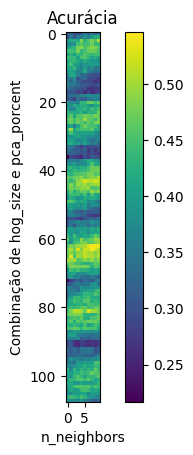

In [21]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Dicionário para armazenar as acurácias por tamanho de HOG
hog_accuracies = {}
# Lista para armazenar todas as acurácias
all_accuracies = [['n_neighbors', 'hog_size', 'pca_porcent', 'accuracy']]
max_accuracy = [0,0,0,0,'','']

for n_neighbors in range(1,11):
  for hogs_vetor in hogs_pcas:
    hog_size = hogs_vetor[0]
    porcent = hogs_vetor[1]
    data = hogs_vetor[2]

    y = data.classe  # Target variable
    X = data.copy().drop('classe', axis=1)  # Features

    # Split dataset into training set and test set
    X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=73)  # 70% training and 30% test

    # Create KNeighborsClassifier object
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean')
    knn.fit(X_train_70, y_train_70)

    # Predict the response for the test dataset
    y_pred = knn.predict(X_test_30)

    # Model Accuracy
    acuracia = metrics.accuracy_score(y_test_30, y_pred)

    #print(f'n_neighbors {n_neighbors}: hog de {hog_size}x{hog_size} e pca de {porcent}')
    #print('Accuracy: %.3f' % acuracia)
    if acuracia > max_accuracy[3]:
      max_accuracy = [n_neighbors, hog_size, porcent, round(acuracia,3), y_test_30, y_pred]

    # Armazenar a acurácia no dicionário usando o tamanho do HOG como chave
    '''if hog_size not in hog_accuracies:
      hog_accuracies[hog_size] = {'porcent': [], 'accuracies': []}
    hog_accuracies[hog_size]['porcent'].append(porcent)
    hog_accuracies[hog_size]['accuracies'].append(acuracia)'''

    # Matriz de confusão para 30%
    #print(confusion_matrix(y_test_30, y_pred))
    # Adicionar a acurácia à lista geral
    all_accuracies.append([n_neighbors,hog_size, porcent, round(acuracia,3)])

data_accuracies = pd.DataFrame(all_accuracies[1:], columns=all_accuracies[0])
matrix = data_accuracies.pivot(index=['hog_size', 'pca_porcent'], columns='n_neighbors', values='accuracy')

# Exibir a matriz
print(matrix)
print(f'Melhor resultado:')
print(f'n_neighbors {max_accuracy[0]}: hog de {max_accuracy[1]}x{max_accuracy[1]} e pca de {max_accuracy[2]}')
print(f'accuracy: {max_accuracy[3]}')

# Exibir um gráfico a partir da matriz (usando um mapa de calor, por exemplo)
plt.imshow(matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xlabel('n_neighbors')
plt.ylabel('Combinação de hog_size e pca_porcent')
plt.title('Acurácia')
plt.show()


## Análise de resultados

Foi visto que o hog de 20x20 obteve os 2 melhores resultados, o qual o melhor foi o com PCA de 45% com acurácia de 0.537

# CNN com PCA

## Aplicando CNN e PCA

In [ ]:
## Carregar as Libs necessarias
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
#pandas e numpy
import numpy as np
import pandas as pd
## Carregar e processar imagem
from skimage import io
from skimage.transform import resize
## Importando PCA do SkLearn
from sklearn.decomposition import PCA
import cv2
#Para evitar erros caso não seja RGB
from PIL import Image
import tempfile


def cnn_pca(model, files, cnn_size):
  pcas = [.10,.15,.20,.25,.30,.35,.40,.45,.50,.55,.60,.65,.70,.75,.80,.85,.90,.95]
  cnn_pcas = []
  cnn_features = []

  for filename in files.keys():
    print(filename)
    img = imread(filename)
    image_resized = resize(img, (128,128))
    ## Colocando a imagem no formato correto
    x = image.img_to_array(image_resized)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    ## Extração de características

    try:
      # Tentar extrair características
      features = model.predict(x)
    except Exception as e:
      # Tratar a exceção (converter a imagem para RGB)
      image_pil = Image.open(filename)
      image_pil = image_pil.convert("RGB")
      # Salvar a imagem temporariamente
      temp_filename = tempfile.NamedTemporaryFile(suffix=".jpg", delete=False).name
      image_pil.save(temp_filename)
      imagem_rgb = io.imread(temp_filename)
      #retornando agora com a imagem rgb
      image_resized_rgb = resize(imagem_rgb, (128, 128))
      x = image.img_to_array(image_resized_rgb)
      x = np.expand_dims(x, axis=0)
      x = preprocess_input(x)
      features = model.predict(x)

    ## Tornar as caracteristicas em forma de vetor
    features_flatten = features.flatten()

    cnn_features.append(features_flatten)

  ## Adicionar as colunas com os valores do cnn para cada um
  data = {"pathfile": files.keys(), "cnn_features": cnn_features}
  df = pd.DataFrame(data)
  df['classe'] = df['pathfile'].str.split('_').str[0]
  df = df.drop('pathfile', axis=1)

  # transformando cada valor do cnn_feature em um atributo (coluna)
  df2 = pd.DataFrame(df['cnn_features'].tolist())
  df2.columns = df2.columns.map(lambda x: f'cnn_feature_{x+1}')
  df = pd.concat([df.drop('cnn_features', axis=1), df2], axis=1)

  # ----- COMEÇANDO PCA ------
  for porcent in pcas:
    y = df.classe # Target variable (classe)
    X = df.copy().drop('classe', axis=1) # Features

    ##pca_obj = PCA(n_components=4) #para dizer quantos componentes quero ter
    pca_obj = PCA(n_components=porcent, whiten=True) #qual porcentagem de informação eu quero
    pca_result = pca_obj.fit_transform(X)

    print(f'cnn de {cnn_size}x{cnn_size} e pca de {porcent}')
    print(f'shape: {pca_result.shape}')
    print()

    colunas = []
    for i in range(pca_result.shape[1]):
      colunas.append('pca_'+str(i))

    pca_dataset = pd.DataFrame(data = pca_result, columns = colunas) # Atual

    ## Juntando o atributo classe
    final_data = pca_dataset.join(y)

    # Salvando Pessoa.csv transformado
    df_cnn_pca = pd.DataFrame(final_data)
    df_cnn_pca.to_csv(f'CNN_{cnn_size}_pca-{porcent}.csv', index=False)

    # Importando arquivo transformado
    from google.colab import files
    files.download(f'CNN_{cnn_size}_pca-{porcent}.csv')
    cnn_pcas.append([cnn_size, porcent, df_cnn_pca])
  return cnn_pcas

## Carregar o modelo de CNN pre-treinado e aplicar
model = VGG16(weights='imagenet', include_top=False, pooling='max')
cnn_pcas = cnn_pca(model, uploaded_images, 'VGG16')


In [ ]:
## Carregar as Libs necessarias
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
#pandas e numpy
import numpy as np
import pandas as pd
## Carregar e processar imagem
from skimage import io
from skimage.transform import resize
## Importando PCA do SkLearn
from sklearn.decomposition import PCA
import cv2
#Para evitar erros caso não seja RGB
from PIL import Image
import tempfile


def cnn_pca(model, files, cnn_size):
  pcas = [.10,.15,.20,.25,.30,.35,.40,.45,.50,.55,.60,.65,.70,.75,.80,.85,.90,.95]
  cnn_pcas = []
  cnn_features = []

  for filename in files.keys():
    print(filename)
    img = imread(filename)
    image_resized = resize(img, (128,128))
    ## Colocando a imagem no formato correto
    x = image.img_to_array(image_resized)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    ## Extração de características

    try:
      # Tentar extrair características
      features = model.predict(x)
    except Exception as e:
      # Tratar a exceção (converter a imagem para RGB)
      image_pil = Image.open(filename)
      image_pil = image_pil.convert("RGB")
      # Salvar a imagem temporariamente
      temp_filename = tempfile.NamedTemporaryFile(suffix=".jpg", delete=False).name
      image_pil.save(temp_filename)
      imagem_rgb = io.imread(temp_filename)
      #retornando agora com a imagem rgb
      image_resized_rgb = resize(imagem_rgb, (128, 128))
      x = image.img_to_array(image_resized_rgb)
      x = np.expand_dims(x, axis=0)
      x = preprocess_input(x)
      features = model.predict(x)

    ## Tornar as caracteristicas em forma de vetor
    features_flatten = features.flatten()

    cnn_features.append(features_flatten)

  ## Adicionar as colunas com os valores do cnn para cada um
  data = {"pathfile": files.keys(), "cnn_features": cnn_features}
  df = pd.DataFrame(data)
  df['classe'] = df['pathfile'].str.split('_').str[0]
  df = df.drop('pathfile', axis=1)

  # transformando cada valor do cnn_feature em um atributo (coluna)
  df2 = pd.DataFrame(df['cnn_features'].tolist())
  df2.columns = df2.columns.map(lambda x: f'cnn_feature_{x+1}')
  df = pd.concat([df.drop('cnn_features', axis=1), df2], axis=1)

  # ----- COMEÇANDO PCA ------
  for porcent in pcas:
    y = df.classe # Target variable (classe)
    X = df.copy().drop('classe', axis=1) # Features

    ##pca_obj = PCA(n_components=4) #para dizer quantos componentes quero ter
    pca_obj = PCA(n_components=porcent, whiten=True) #qual porcentagem de informação eu quero
    pca_result = pca_obj.fit_transform(X)

    print(f'cnn de {cnn_size}x{cnn_size} e pca de {porcent}')
    print(f'shape: {pca_result.shape}')
    print()

    colunas = []
    for i in range(pca_result.shape[1]):
      colunas.append('pca_'+str(i))

    pca_dataset = pd.DataFrame(data = pca_result, columns = colunas) # Atual

    ## Juntando o atributo classe
    final_data = pca_dataset.join(y)

    # Salvando Pessoa.csv transformado
    df_cnn_pca = pd.DataFrame(final_data)
    df_cnn_pca.to_csv(f'CNN_{cnn_size}_pca-{porcent}.csv', index=False)

    # Importando arquivo transformado
    from google.colab import files
    files.download(f'CNN_{cnn_size}_pca-{porcent}.csv')
    cnn_pcas.append([cnn_size, porcent, df_cnn_pca])
  return cnn_pcas

## Carregar o modelo de CNN pre-treinado e aplicar
model = VGG16(weights='imagenet', include_top=False, pooling='max')
cnn_pcas = cnn_pca(model, uploaded_images, 'VGG16')


## Treinamento

cnn de VGG16xVGG16 e pca de 0.1
Accuracy: 0.263
[[15 12 18 12]
 [16 17 11 15]
 [21 13 17 10]
 [18 22  9 14]]

cnn de VGG16xVGG16 e pca de 0.15
Accuracy: 0.263
[[15 12 18 12]
 [16 17 11 15]
 [21 13 17 10]
 [18 22  9 14]]

cnn de VGG16xVGG16 e pca de 0.2
Accuracy: 0.263
[[15 12 18 12]
 [16 17 11 15]
 [21 13 17 10]
 [18 22  9 14]]

cnn de VGG16xVGG16 e pca de 0.25
Accuracy: 0.263
[[15 12 18 12]
 [16 17 11 15]
 [21 13 17 10]
 [18 22  9 14]]

cnn de VGG16xVGG16 e pca de 0.3
Accuracy: 0.263
[[15 12 18 12]
 [16 17 11 15]
 [21 13 17 10]
 [18 22  9 14]]

cnn de VGG16xVGG16 e pca de 0.35
Accuracy: 0.304
[[23 10 14 10]
 [25 18  8  8]
 [13 15 19 14]
 [21 16 13 13]]

cnn de VGG16xVGG16 e pca de 0.4
Accuracy: 0.304
[[23 10 14 10]
 [25 18  8  8]
 [13 15 19 14]
 [21 16 13 13]]

cnn de VGG16xVGG16 e pca de 0.45
Accuracy: 0.304
[[23 10 14 10]
 [25 18  8  8]
 [13 15 19 14]
 [21 16 13 13]]

cnn de VGG16xVGG16 e pca de 0.5
Accuracy: 0.304
[[23 10 14 10]
 [25 18  8  8]
 [13 15 19 14]
 [21 16 13 13]]

cnn de

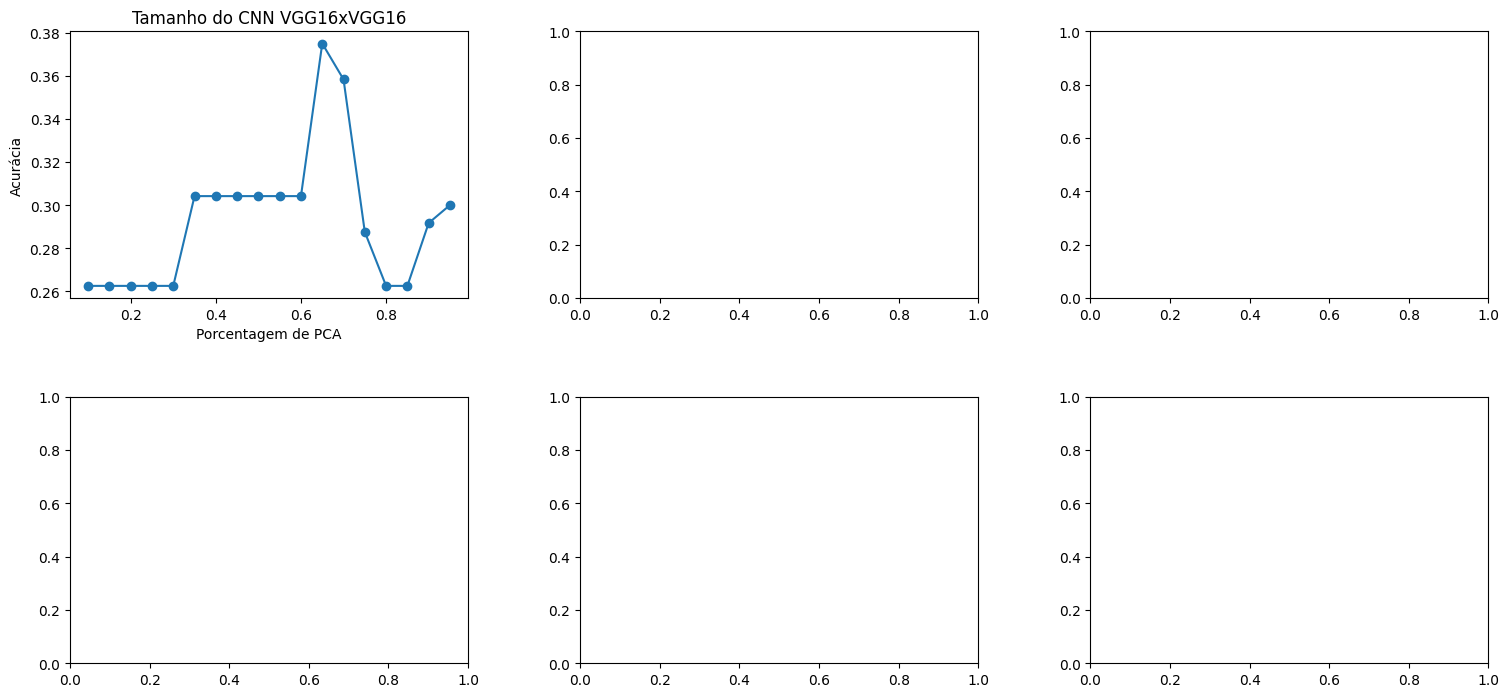

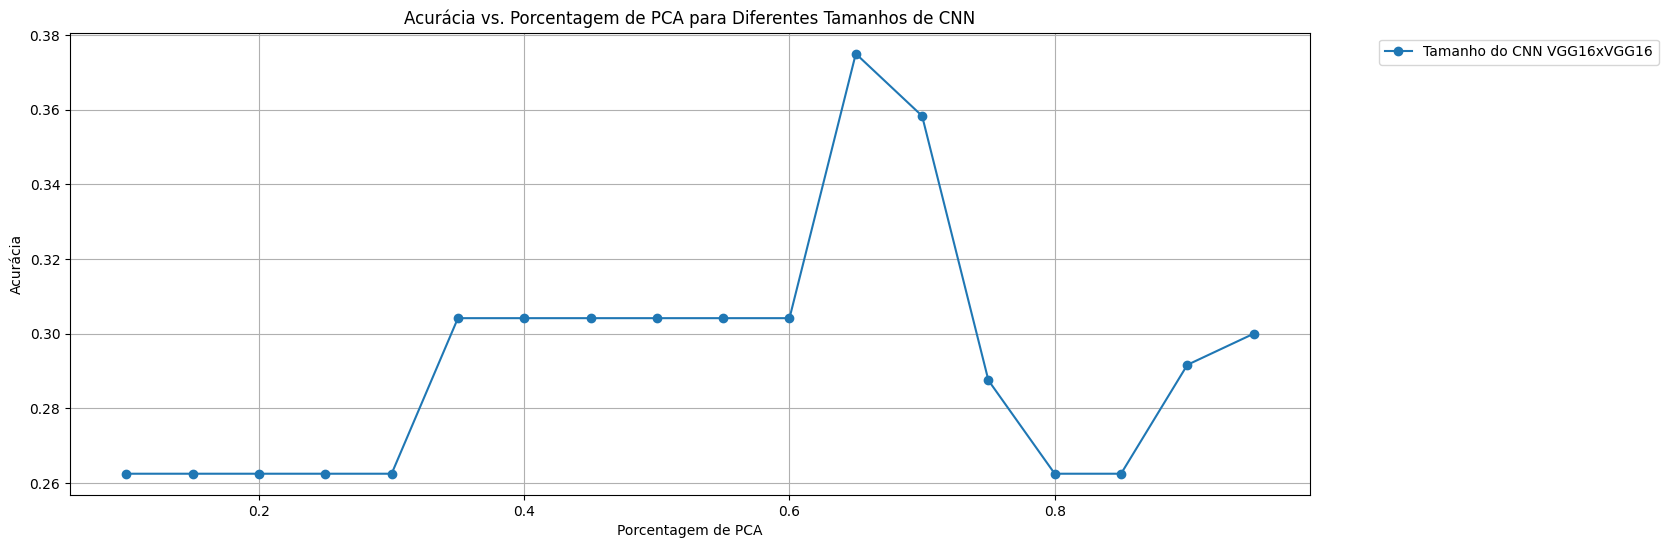

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Dicionário para armazenar as acurácias por tamanho de cnn
cnn_accuracies = {}
# Lista para armazenar todas as acurácias
all_accuracies = []

# Criar uma figura com 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
fig.tight_layout(pad=5.0)

for cnn_vetor in cnn_pcas:
  cnn_size = cnn_vetor[0]
  porcent = cnn_vetor[1]
  data = cnn_vetor[2]

  y = data.classe  # Target variable
  X = data.copy().drop('classe', axis=1)  # Features

  # Split dataset into training set and test set
  X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=73)  # 70% training and 30% test

  # Create KNeighborsClassifier object
  knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean') #utilizando o n_neighbors = 5 por ser mais indicado
  knn.fit(X_train_70, y_train_70)

  # Predict the response for the test dataset
  y_pred = knn.predict(X_test_30)

  # Model Accuracy
  acuracia = metrics.accuracy_score(y_test_30, y_pred)

  print(f'cnn de {cnn_size}x{cnn_size} e pca de {porcent}')
  print('Accuracy: %.3f' % acuracia)

  # Armazenar a acurácia no dicionário usando o tamanho do cnn como chave
  if cnn_size not in cnn_accuracies:
    cnn_accuracies[cnn_size] = {'porcent': [], 'accuracies': []}
  cnn_accuracies[cnn_size]['porcent'].append(porcent)
  cnn_accuracies[cnn_size]['accuracies'].append(acuracia)

  # Matriz de confusão para 30%
  print(confusion_matrix(y_test_30, y_pred))
  print()
  # Adicionar a acurácia à lista geral
  all_accuracies.append((cnn_size, porcent, acuracia))

# Criar um gráfico de linha para cada tamanho de cnn em subplots separados
for idx, (cnn_size, data) in enumerate(cnn_accuracies.items()):
    row = idx // 3
    col = idx % 3
    axs[row, col].plot(data['porcent'], data['accuracies'], marker='o')
    axs[row, col].set_xlabel('Porcentagem de PCA')
    axs[row, col].set_ylabel('Acurácia')
    axs[row, col].set_title(f'Tamanho do CNN {cnn_size}x{cnn_size}')


# Criar um gráfico de linha para cada tamanho de cnn e adicione legendas
plt.figure(figsize=(16, 6))
for cnn_size, data in cnn_accuracies.items():
  plt.plot(data['porcent'], data['accuracies'], marker='o', label=f'Tamanho do CNN {cnn_size}x{cnn_size}')

# Adicionar rótulos aos eixos
plt.xlabel('Porcentagem de PCA')
plt.ylabel('Acurácia')

# Adicionar um título ao gráfico
plt.title('Acurácia vs. Porcentagem de PCA para Diferentes Tamanhos de CNN')

# Adicionar uma legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibir o gráfico
plt.grid()
plt.show()
